In [ ]:
#import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer # for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder # for scaling and encoding
from sklearn.model_selection import train_test_split # for splitting data

In [301]:
#load the cleaned data
df_cleaned = pd.read_csv("../data/cleaned_data.csv")

In [302]:
#display the first few rows of the dataframe
df_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,683.0,Germany,Male,49.0,7.0,123837.86,2.0,1.0,1.0,138700.75,1
1,608.0,France,Female,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0
2,539.0,France,Female,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0
3,530.0,Spain,Female,39.0,8.0,0.00,2.0,0.0,0.0,177896.93,0
4,613.0,France,Female,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0


In [303]:
#display the shape of the dataframe
df_cleaned.shape

(15000, 11)

In [304]:

df_test = pd.read_csv("../data/test.csv")

In [305]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15797736.0,Chikwendu,591.0,Germany,Female,32.0,2.0,106881.50,2.0,1.0,0.0,122810.53
1,15001,15676515.0,Lai,553.0,Spain,Male,37.0,2.0,0.00,2.0,1.0,0.0,63736.17
2,15002,15701291.0,Folliero,646.0,France,Female,29.0,7.0,0.00,2.0,1.0,0.0,121866.87
3,15003,15594812.0,Trevisani,603.0,Germany,Male,49.0,8.0,131394.56,1.0,0.0,1.0,147059.28
4,15004,15791321.0,Ch'ien,645.0,Spain,Female,39.0,3.0,0.00,2.0,1.0,0.0,129975.94


In [306]:
df_test.shape

(10000, 13)

In [307]:
#separate numerical and categorical variables
num_var = df_cleaned.select_dtypes(include=['int64', 'float64'])
cat_var = df_cleaned.select_dtypes(include=['object','category'])

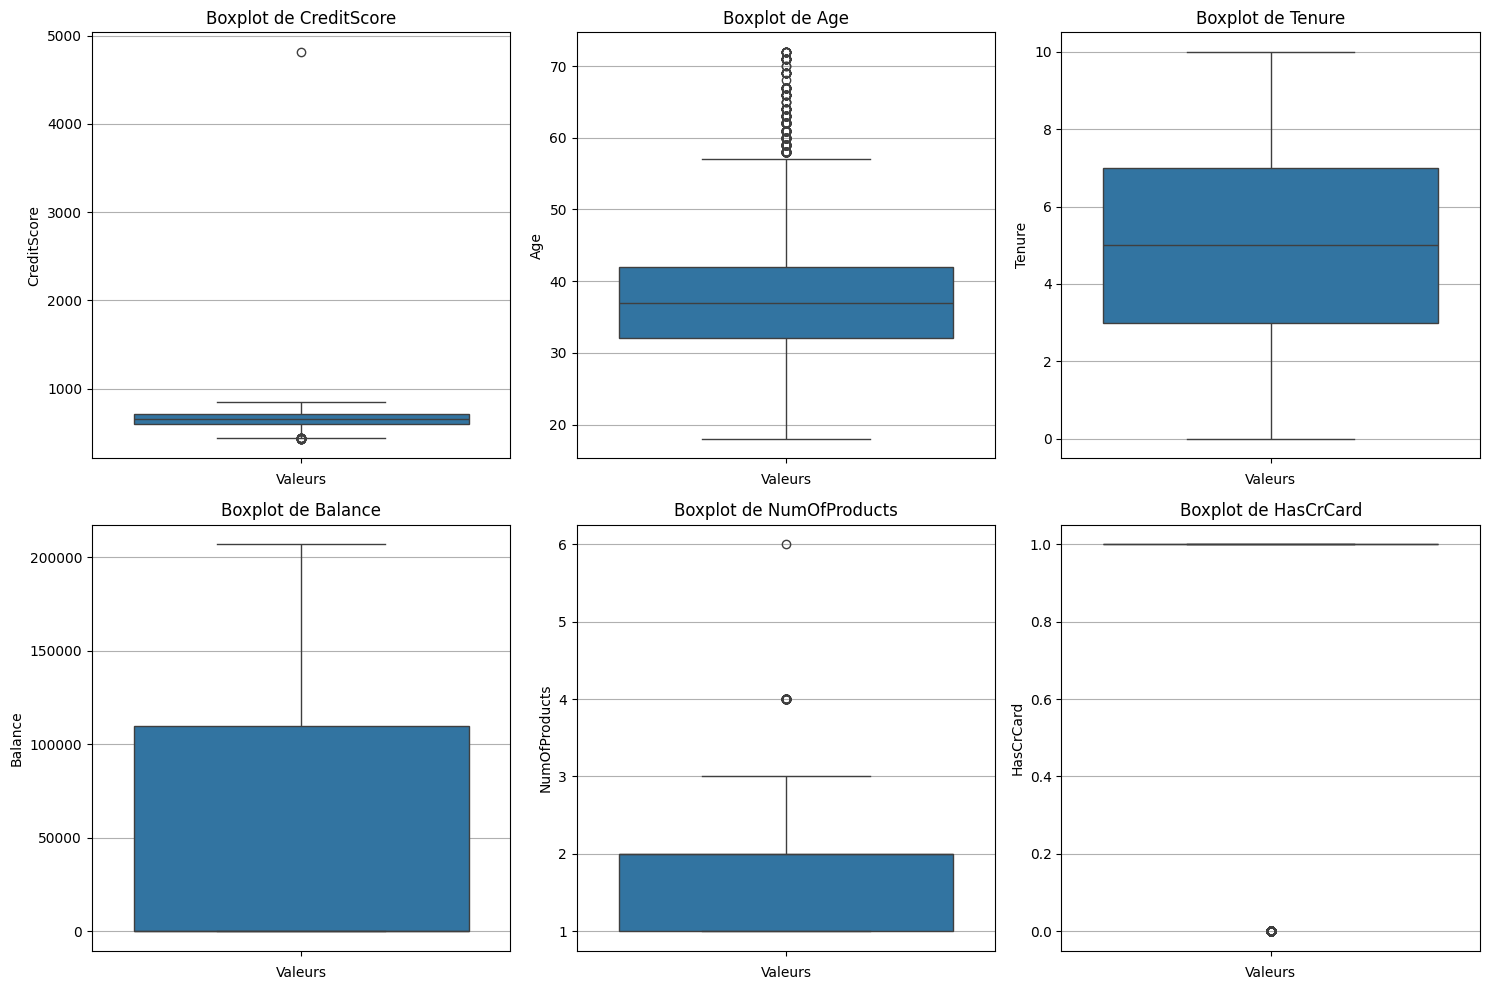

In [308]:
# Boxplot des variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), num_var.columns):
    sns.boxplot(y=df_cleaned[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [309]:
# Fonction pour supprimer les outliers en utilisant l'IQR
def remove_outliers(df, features):
    df_cleaned = df.copy()
    for feature in features:
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrer les lignes sans outliers
        df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    return df_cleaned

In [310]:
df_cleaned = remove_outliers(df_cleaned, num_var.columns)

In [311]:
df_cleaned.shape

(9243, 11)

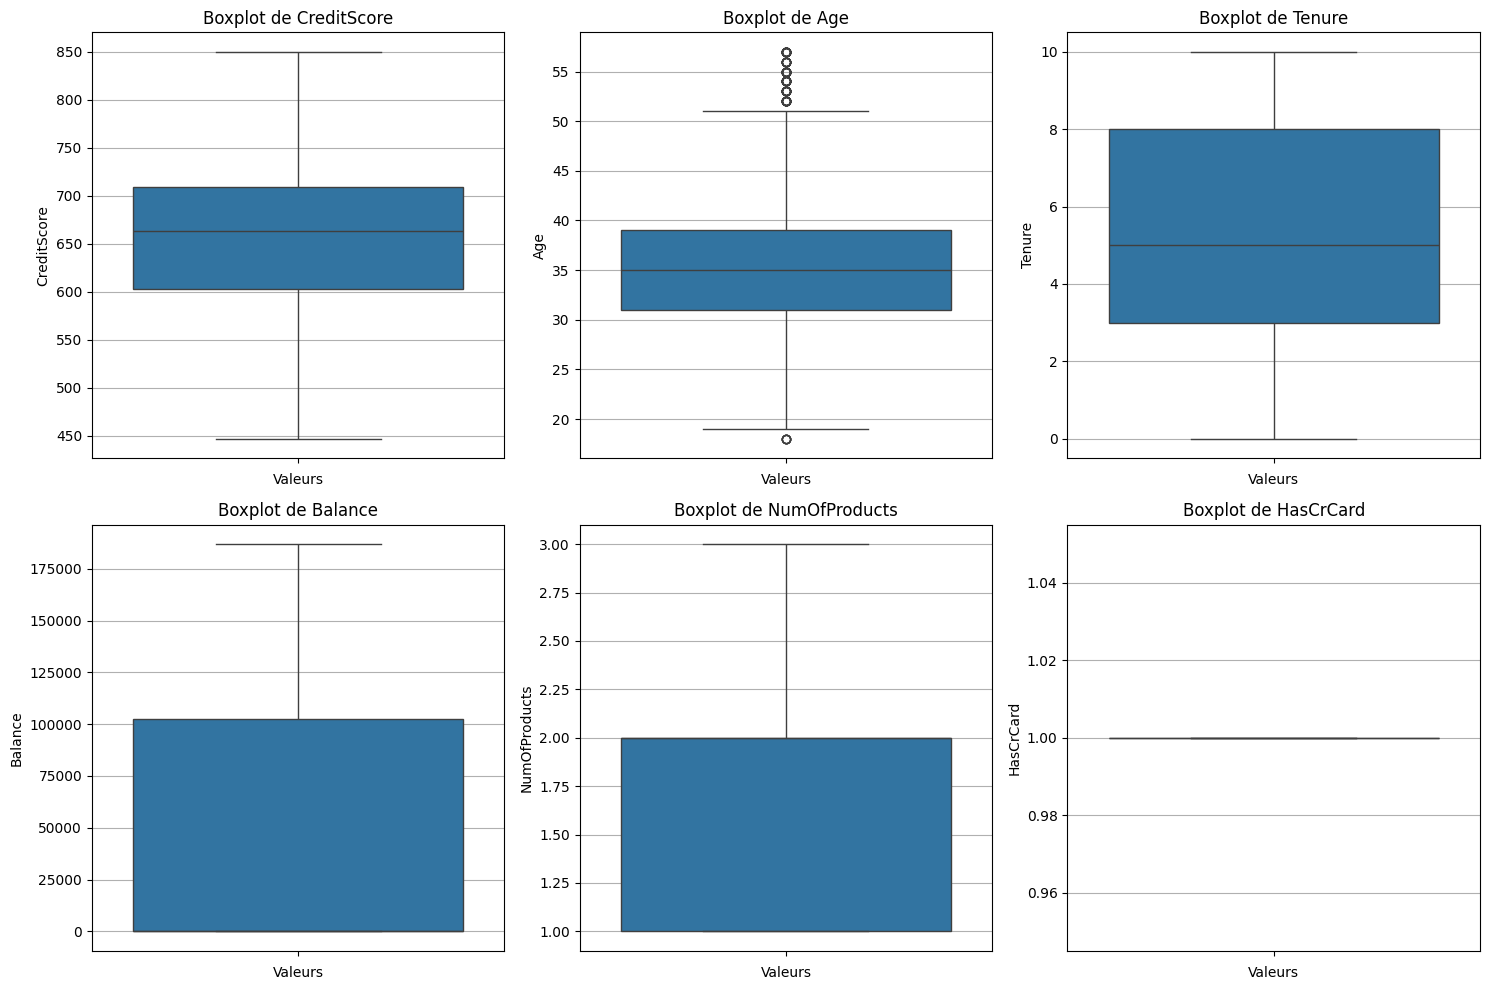

In [312]:
# Boxplot des variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), num_var.columns):
    sns.boxplot(y=df_cleaned[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [313]:
# 1. Ratio du solde par rapport au salaire estimé
df_cleaned['Ratio_Balance_Salary'] = df_cleaned['Balance'] / df_cleaned['EstimatedSalary']

# 2. Ratio du solde par l'âge
df_cleaned['Ratio_Balance_Age'] = df_cleaned['Balance'] / df_cleaned['Age']

# 3. Ratio du salaire par l'âge
df_cleaned['Ratio_Salary_Age'] = df_cleaned['EstimatedSalary'] / df_cleaned['Age']

# 4. Score d'engagement
df_cleaned['Engagement_Score'] = df_cleaned['IsActiveMember'] + df_cleaned['NumOfProducts'] + df_cleaned['HasCrCard']

# 5. Ratio Produits/Age
df_cleaned['Ratio_Products_Age'] = df_cleaned['NumOfProducts'] / df_cleaned['Age']

# 6. Score de revenu relatif par pays
df_cleaned['Relative_Salary'] = df_cleaned['EstimatedSalary'] / df_cleaned.groupby('Geography')['EstimatedSalary'].transform('mean')

# 7. Ratio Crédit/Age
df_cleaned['Ratio_CreditScore_Age'] = df_cleaned['CreditScore'] / df_cleaned['Age']

# 8. Solde nul avec une carte de crédit
df_cleaned['Zero_Balance_HasCrCard'] = (df_cleaned['Balance'] == 0) & (df_cleaned['HasCrCard'] == 1)

# 9. Client actif avec faible solde
df_cleaned['Low_Balance_Active'] = (df_cleaned['Balance'] < df_cleaned['Balance'].mean()) & (df_cleaned['IsActiveMember'] == 1)

# 10. Possède une carte et est actif
df_cleaned['Active_HasCrCard'] = df_cleaned['IsActiveMember'] * df_cleaned['HasCrCard']

# 11. Logarithme du salaire estimé
df_cleaned['Log_Salary'] = np.log1p(df_cleaned['EstimatedSalary'])

# 1. Ratio du solde par rapport au salaire estimé
df_test['Ratio_Balance_Salary'] = df_test['Balance'] / df_test['EstimatedSalary']

# 2. Ratio du solde par l'âge
df_test['Ratio_Balance_Age'] = df_test['Balance'] / df_test['Age']

# 3. Ratio du salaire par l'âge
df_test['Ratio_Salary_Age'] = df_test['EstimatedSalary'] / df_test['Age']

# 4. Score d'engagement
df_test['Engagement_Score'] = df_test['IsActiveMember'] + df_test['NumOfProducts'] + df_test['HasCrCard']

# 5. Ratio Produits/Age
df_test['Ratio_Products_Age'] = df_test['NumOfProducts'] / df_test['Age']

# 6. Score de revenu relatif par pays
df_test['Relative_Salary'] = df_test['EstimatedSalary'] / df_test.groupby('Geography')['EstimatedSalary'].transform('mean')

# 7. Ratio Crédit/Age
df_test['Ratio_CreditScore_Age'] = df_test['CreditScore'] / df_test['Age']

# 8. Solde nul avec une carte de crédit
df_test['Zero_Balance_HasCrCard'] = (df_test['Balance'] == 0) & (df_test['HasCrCard'] == 1)

# 9. Client actif avec faible solde
df_test['Low_Balance_Active'] = (df_test['Balance'] < df_test['Balance'].mean()) & (df_test['IsActiveMember'] == 1)

# 10. Possède une carte et est actif
df_test['Active_HasCrCard'] = df_test['IsActiveMember'] * df_test['HasCrCard']

# 11. Logarithme du salaire estimé
df_test['Log_Salary'] = np.log1p(df_test['EstimatedSalary'])

In [314]:
#separate numerical and categorical variables
num_var = df_cleaned.select_dtypes(include=['int64', 'float64'])
cat_var = df_cleaned.select_dtypes(include=['object','category'])

In [315]:
num_var

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Ratio_Balance_Salary,Ratio_Balance_Age,Ratio_Salary_Age,Engagement_Score,Ratio_Products_Age,Relative_Salary,Ratio_CreditScore_Age,Active_HasCrCard,Log_Salary
1,608.0,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0,0.000000,0.000000,4890.790667,4.0,0.066667,1.256612,20.266667,1.0,11.896313
2,539.0,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0,0.000000,0.000000,2964.800000,3.0,0.031250,0.812543,16.843750,1.0,11.460311
4,613.0,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0,0.000000,0.000000,2594.403111,4.0,0.044444,0.999887,13.622222,1.0,11.667783
5,656.0,33.0,7.0,98899.76,1.0,1.0,0.0,123597.93,0,0.800173,2996.962424,3745.391818,2.0,0.030303,1.058552,19.878788,0.0,11.724797
8,704.0,49.0,9.0,80793.58,1.0,1.0,0.0,101371.72,0,0.797003,1648.848571,2068.810612,2.0,0.020408,0.870513,14.367347,0.0,11.526559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,681.0,31.0,1.0,0.00,2.0,1.0,1.0,125445.80,0,0.000000,0.000000,4046.638710,4.0,0.064516,1.077245,21.967742,1.0,11.739637
14996,549.0,34.0,7.0,134464.58,1.0,1.0,0.0,126535.92,0,1.062659,3954.840588,3721.644706,2.0,0.029412,1.073167,16.147059,0.0,11.748289
14997,550.0,46.0,5.0,0.00,2.0,1.0,1.0,133897.32,0,0.000000,0.000000,2910.811304,4.0,0.043478,1.146761,11.956522,1.0,11.804836
14998,647.0,25.0,4.0,141616.55,2.0,1.0,0.0,187597.98,0,0.754894,5664.662000,7503.919200,3.0,0.080000,1.606679,25.880000,0.0,12.142062


In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_var),           
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)
    ]
)

In [ ]:
#df_cleaned.to_csv('../data/preprocessed_data.csv', index=False)